# NBA Contract Year Performance Analysis
May 2016

Written by Amar Shah (ads691@stern.nyu.edu) and Yasser Ahmad (ya715@stern.nyu.edu ) at NYU Stern with help from Professor David Backus

### Background

Amar Shah is a recent graduate of the NYU Stern School of Business, where he specialized in strategy and corporate finance. Before attending Stern, Amar worked at Groupon in their Financial Planning and Analysis group in Chicago. Upon graduating from Stern, Amar will be joining Amazon as a Senior Financial Analyst in their International Finance Retail organization. Amazon being a large believer in the power of data, the ability to breakdown, analyze, and present data will be very important and as such Python will come in handy.

Yasser Ahmad is a recent graduate of the NYU Stern School of Business, where he specialized in strategy, finance, and management.  Mr. Ahmad possesses strong analytical skills as well as strong interpersonal skills, the quintessential combination of EQ + IQ.  Prior to NYU Stern, Mr. Ahmad worked as a management consultant, advising clients in over 30 countries on their most pressing business problems.  Mr. Ahmad will be returning to management consulting this summer. 

### Abstract 

The NBA contract year performance phenomenon is one that is talked about more and more amongst NBA general managers, analysts, and fans. Essentially they are speaking about the incentives a player has to statisically improve their level of play prior to receiving a contract extention and then the moral hazard that exists thereafter. A player may exert extra effort to show that they are an elite player or at least better than what their historical averages present them to be capable of. This will get the attention of NBA general managers and the player hopes that the associated payday will be refelcted primairly on their most recent performance. Once the contract has been signed, the player is essentially guaranteed the agreed upon yearly salary for the agreed upon time frame. The theory then is that since the player has no incentive to play any harder since the payout is locked in, the player's statistics across the board may drop as a result. We wanted to look into this to see if its a routine occurence and if so what areas it stands out in so that the party giving the contract can make a well informed decision.

### Methodology


#### Step 1:
We first isolated 2013 to identify which NBA players were in a contract year that year. The following website had this data:
http://www.spotrac.com/nba/free-agents/2013/

This data was not readily available in a downloadable format and therefore we had to use import.io to web scrape the data into a .xlsx file. This file includes player name, position, age, type of free agent, previous and new team, contract length, contract value, and average yearly contract value. This will allow us to analyze the effects through many different slices of the data.

#### Step 2:

Next we had to merge the data from above into one that contains statistics for these players for three years prior and three years after the contract was enacted. For this we used the .csv files found on http://www.basketball-reference.com/leagues/ to compile this data into a .xlsx file for the following years: 10-11, 11-12, 12-13, 13-14, 14-15, 15-16. This meant using the following links:

http://www.basketball-reference.com/leagues/NBA_2016_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2015_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2014_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2013_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2012_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2011_per_game.html

#### Step 3:

We then stored these two .xlsx files on a github depository (addresses shown in code below) and we will do a merge based off the player values to join both sets of data. 

We now have all the data needed to start analyzing and producing graphs for our project.

While we understand this limits the automated functionality of this code, we found it difficult to come across readily downloadable files to pull all this for us. 

#### Step 4:

Lastly we will try to isolate this behavior across several different metrics to showcase any trends we see that lead us to believe the contract year phenomenon is present. The metrics include points per game, usage rate (what percent of plays is that player actively involved in), and PER (player efficiency rating - a weighted measure across multiple categories that gives a well rounded statistic for a player). We will also show a histogram of all players across those three metrics to see if there is a lack of talent that results in the overpaying of some atheletes (supply issue that forces up price).
 



### Import Packages

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 


%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Today:  2016-05-09


### Import and Merge Data

In [2]:
url1 = 'https://github.com/amars16/NBA_Contract/blob/master/Contract_Data.xlsx?raw=true'
url2= 'https://github.com/amars16/NBA_Contract/blob/master/Player_Stats.xlsx?raw=true'


c2013 = pd.read_excel(url1,'2013')

p10_11 = pd.read_excel(url2,'10-11')
p11_12 = pd.read_excel(url2,'11-12')
p12_13 = pd.read_excel(url2,'12-13')
p13_14 = pd.read_excel(url2,'13-14')
p14_15 = pd.read_excel(url2,'14-15')
p15_16 = pd.read_excel(url2,'15-16')

In [3]:
c2013_a = pd.merge(c2013, p10_11, how='left', on='PLAYER')
c2013_b = pd.merge(c2013, p11_12, how='left', on='PLAYER')
c2013_c = pd.merge(c2013, p12_13, how='left', on='PLAYER')
c2013_d = pd.merge(c2013, p13_14, how='left', on='PLAYER')
c2013_e = pd.merge(c2013, p14_15, how='left', on='PLAYER')
c2013_f = pd.merge(c2013, p15_16, how='left', on='PLAYER')

### Reshape Tables and Breakout by Position

In [4]:
c_PTS = pd.concat([c2013_a['PTS'].rename('10-11'),c2013_b['PTS'].rename('11-12'),c2013_c['PTS'].rename('12-13'),c2013_d['PTS'].rename('13-14'),c2013_e['PTS'].rename('14-15'),c2013_f['PTS'].rename('15-16')],axis=1).T

c_USG = pd.concat([c2013_a['USG%'].rename('10-11'),c2013_b['USG%'].rename('11-12'),c2013_c['USG%'].rename('12-13'),c2013_d['USG%'].rename('13-14'),c2013_e['USG%'].rename('14-15'),c2013_f['USG%'].rename('15-16')],axis=1).T

c_PER = pd.concat([c2013_a['PER'].rename('10-11'),c2013_b['PER'].rename('11-12'),c2013_c['PER'].rename('12-13'),c2013_d['PER'].rename('13-14'),c2013_e['PER'].rename('14-15'),c2013_f['PER'].rename('15-16')],axis=1).T

In [5]:
c_PTS_C = pd.concat([c2013_a[(c2013_a.POS=='C')]['PTS'].rename('10-11'),c2013_b[(c2013_b.POS=='C')]['PTS'].rename('11-12'),c2013_c[(c2013_c.POS=='C')]['PTS'].rename('12-13'),c2013_d[(c2013_d.POS=='C')]['PTS'].rename('13-14'),c2013_e[(c2013_e.POS=='C')]['PTS'].rename('14-15'),c2013_f[(c2013_f.POS=='C')]['PTS'].rename('15-16')],axis=1).T
c_PTS_F = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SF'))],c2013_a[(c2013_a.POS==('PF'))]])['PTS'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SF'))],c2013_b[(c2013_b.POS==('PF'))]])['PTS'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SF'))],c2013_c[(c2013_c.POS==('PF'))]])['PTS'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SF'))],c2013_d[(c2013_d.POS==('PF'))]])['PTS'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SF'))],c2013_e[(c2013_e.POS==('PF'))]])['PTS'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SF'))],c2013_f[(c2013_f.POS==('PF'))]])['PTS'].rename('15-16')],axis=1).T
c_PTS_G = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SG'))],c2013_a[(c2013_a.POS==('PG'))]])['PTS'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SG'))],c2013_b[(c2013_b.POS==('PG'))]])['PTS'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SG'))],c2013_c[(c2013_c.POS==('PG'))]])['PTS'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SG'))],c2013_d[(c2013_d.POS==('PG'))]])['PTS'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SG'))],c2013_e[(c2013_e.POS==('PG'))]])['PTS'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SG'))],c2013_f[(c2013_f.POS==('PG'))]])['PTS'].rename('15-16')],axis=1).T

c_USG_C = pd.concat([c2013_a[(c2013_a.POS=='C')]['USG%'].rename('10-11'),c2013_b[(c2013_b.POS=='C')]['USG%'].rename('11-12'),c2013_c[(c2013_c.POS=='C')]['USG%'].rename('12-13'),c2013_d[(c2013_d.POS=='C')]['USG%'].rename('13-14'),c2013_e[(c2013_e.POS=='C')]['USG%'].rename('14-15'),c2013_f[(c2013_f.POS=='C')]['USG%'].rename('15-16')],axis=1).T
c_USG_F = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SF'))],c2013_a[(c2013_a.POS==('PF'))]])['USG%'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SF'))],c2013_b[(c2013_b.POS==('PF'))]])['USG%'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SF'))],c2013_c[(c2013_c.POS==('PF'))]])['USG%'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SF'))],c2013_d[(c2013_d.POS==('PF'))]])['USG%'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SF'))],c2013_e[(c2013_e.POS==('PF'))]])['USG%'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SF'))],c2013_f[(c2013_f.POS==('PF'))]])['USG%'].rename('15-16')],axis=1).T
c_USG_G = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SG'))],c2013_a[(c2013_a.POS==('PG'))]])['USG%'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SG'))],c2013_b[(c2013_b.POS==('PG'))]])['USG%'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SG'))],c2013_c[(c2013_c.POS==('PG'))]])['USG%'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SG'))],c2013_d[(c2013_d.POS==('PG'))]])['USG%'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SG'))],c2013_e[(c2013_e.POS==('PG'))]])['USG%'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SG'))],c2013_f[(c2013_f.POS==('PG'))]])['USG%'].rename('15-16')],axis=1).T

c_PER_C = pd.concat([c2013_a[(c2013_a.POS=='C')]['PER'].rename('10-11'),c2013_b[(c2013_b.POS=='C')]['PER'].rename('11-12'),c2013_c[(c2013_c.POS=='C')]['PER'].rename('12-13'),c2013_d[(c2013_d.POS=='C')]['PER'].rename('13-14'),c2013_e[(c2013_e.POS=='C')]['PER'].rename('14-15'),c2013_f[(c2013_f.POS=='C')]['PER'].rename('15-16')],axis=1).T
c_PER_F = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SF'))],c2013_a[(c2013_a.POS==('PF'))]])['PER'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SF'))],c2013_b[(c2013_b.POS==('PF'))]])['PER'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SF'))],c2013_c[(c2013_c.POS==('PF'))]])['PER'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SF'))],c2013_d[(c2013_d.POS==('PF'))]])['PER'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SF'))],c2013_e[(c2013_e.POS==('PF'))]])['PER'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SF'))],c2013_f[(c2013_f.POS==('PF'))]])['PER'].rename('15-16')],axis=1).T
c_PER_G = pd.concat([pd.concat([c2013_a[(c2013_a.POS==('SG'))],c2013_a[(c2013_a.POS==('PG'))]])['PER'].rename('10-11'),pd.concat([c2013_b[(c2013_b.POS==('SG'))],c2013_b[(c2013_b.POS==('PG'))]])['PER'].rename('11-12'),pd.concat([c2013_c[(c2013_c.POS==('SG'))],c2013_c[(c2013_c.POS==('PG'))]])['PER'].rename('12-13'),pd.concat([c2013_d[(c2013_d.POS==('SG'))],c2013_d[(c2013_d.POS==('PG'))]])['PER'].rename('13-14'),pd.concat([c2013_e[(c2013_e.POS==('SG'))],c2013_e[(c2013_e.POS==('PG'))]])['PER'].rename('14-15'),pd.concat([c2013_f[(c2013_f.POS==('SG'))],c2013_f[(c2013_f.POS==('PG'))]])['PER'].rename('15-16')],axis=1).T

### Dispersion of Player Efficieny Rating by Position

The chart below attempts to show the relative supply of talented players by position, with red being guards, blue being centers, and green being forwards. What the chart shows us is that great guards are relatively harder to come by than centers and forwards (assuming anything above 15 is considered great). What this means is that a general manager may choose to pay a guard more per unit of PER than the other posiitons simply based off the lack of relative supply of talented players at this position.

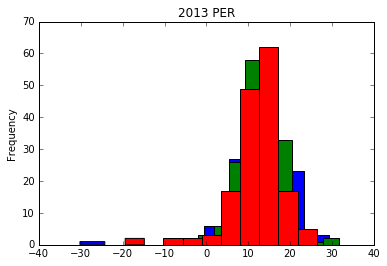

In [6]:
p12_13[p12_13.Pos ==('C')]['PER'].plot(kind='hist',color='blue', title='2013 PER')
pd.concat([p12_13[(p12_13.Pos==('SF'))],p12_13[(p12_13.Pos==('PF'))]])['PER'].plot(kind='hist',color='green')
pd.concat([p12_13[(p12_13.Pos==('PG'))],p12_13[(p12_13.Pos==('SG'))]])['PER'].plot(kind='hist',color='red')

### Points per Game by Position

The charts below provide us with the following insights. In general a player's points per game production decreases sharply in the years after signing a new contract. This observation is most pronounced among the Center position.  The only positions were players were able to significantly improve their point production was the guard position. We also notice that amongst players who play the guard position, point production improves materially  in the contract year. 

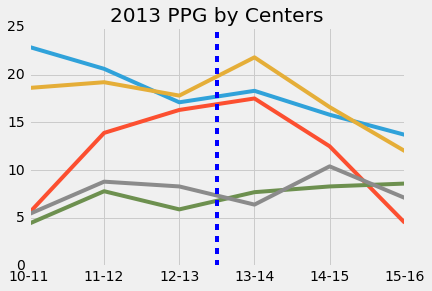

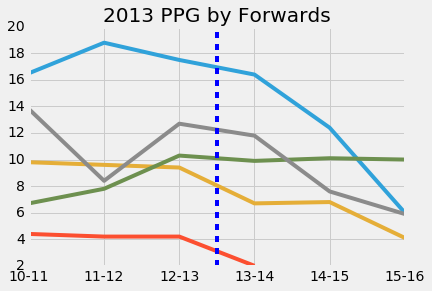

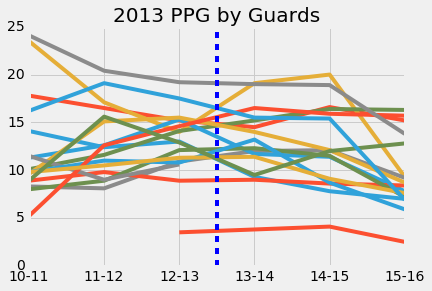

In [7]:
plt.style.use('fivethirtyeight')
c_PTS_C.plot(legend=False, subplots = False, title = "2013 PPG by Centers")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_PTS_F.plot(legend=False, subplots = False, title = "2013 PPG by Forwards")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_PTS_G.plot(legend=False, subplots = False, title = "2013 PPG by Guards")
plt.axvline(2.5,ls='--')


### Usage Rate by Position

The usage rate charts below provide us with the following insights. For players who play the center position, the usage rate increases the year after they sign a new contract. This makes sense. Teams sign players that they think will be an integral part of the team.  Therefore, there is pressure on the coach to make sure that newly signed players receive playing time, justifying th signing to the fan base.  

What is surprising is that amongst players who play the forward position, usage rate general declines a little bit in the year after they sign a new contract. The point guard position is a mixed bag; most point guards see increased usage rates, while a few see a dip in usage rates. 

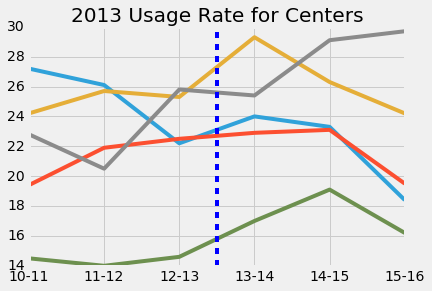

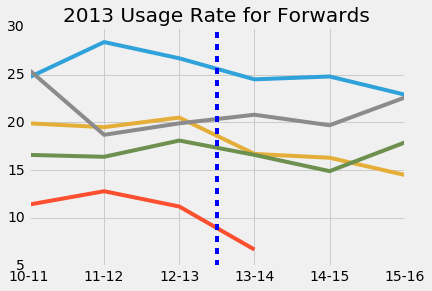

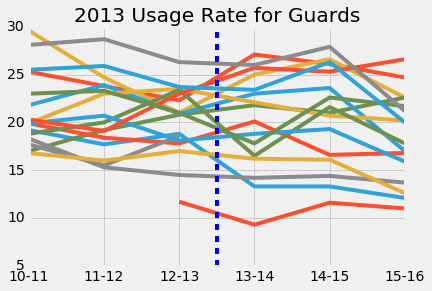

In [8]:

plt.style.use('fivethirtyeight')
c_USG_C.plot(legend=False, subplots = False, title = "2013 Usage Rate for Centers")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_USG_F.plot(legend=False, subplots = False, title = "2013 Usage Rate for Forwards")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_USG_G.plot(legend=False, subplots = False, title = "2013 Usage Rate for Guards")
plt.axvline(2.5,ls='--')


### Player Efficiency Rating by Position

The most important statiscal metric is the Player Efficiency Ranking (PER).  PER incorporates multiple statistical categories: points, assists, rebounds, etc.  This provides coaches and general managers with a more accurate picture of a player's contribution.

The graphs below provide the following insights. For centers and forwards PER generally declines in the contract year.  This is a surprising finding as one would expect players to increase their value to a team in the contract year.  However, players may be gaming the system and focusing on a singular statistic such as rebounds or blocks.  While these statistics may look appealing they may not provide the greatest value to a team.  In the years following the new contracts a center's and forward's production declines using the PER metric. 

Again, with guards it is a mixed bag of results.  Most guards see an increase in the PER metric in the contract year.  In the years following the contract year, some guards see an increase in PER while others see a decrease.  After the 3 year point, most guards observe a decrease in the PER metric. 


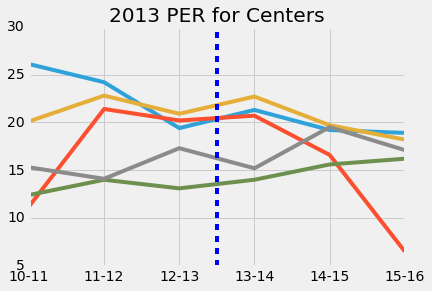

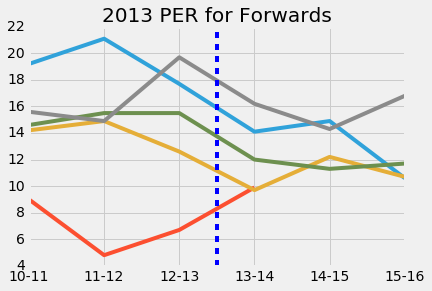

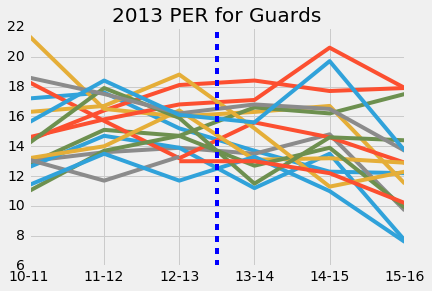

In [9]:
plt.style.use('fivethirtyeight')
c_PER_C.plot(legend=False, subplots = False, title = "2013 PER for Centers")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_PER_F.plot(legend=False, subplots = False, title = "2013 PER for Forwards")
plt.axvline(2.5,ls='--')

plt.style.use('fivethirtyeight')
c_PER_G.plot(legend=False, subplots = False, title = "2013 PER for Guards")
plt.axvline(2.5,ls='--')


## Conclusion

While results are mixed by position and statistic, we can resonably assume that there will be an effect based off an upcoming contract negotiation, and most likely hurt the team post contract. There are some players that buck the trend and this can be asssociated with the players' age (may be looking for a new contract later on still so they have to keep improving), teammates (there could be strong leaders on the team that push everyone to play at their best all the time), coaching staff (some coaches are able to develop players more than others), and overall team competitiveness (consistent playoff caliber team vs bottom of the bunch). This analysis however can be a baseline upon which these other factors are layered onto to make the forecast of a player's performance that much more accurate.

## Sources

#### Player Contract Data:
http://www.spotrac.com/nba/free-agents/2013/

#### Player Statistics Data:
http://www.basketball-reference.com/leagues/NBA_2016_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2015_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2014_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2013_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2012_per_game.html,

http://www.basketball-reference.com/leagues/NBA_2011_per_game.html